Colunas disponíveis: Index(['total_volume', 'total_sales', 'total_supply', 'num_owners',
       'average_price', 'num_reports', 'market_cap', 'floor_price', 'category',
       'qtd_traits', 'qtd_editors', 'target'],
      dtype='object')
Acurácia no conjunto de teste: 0.60
Árvore salva como 'decision_tree_nft.png'


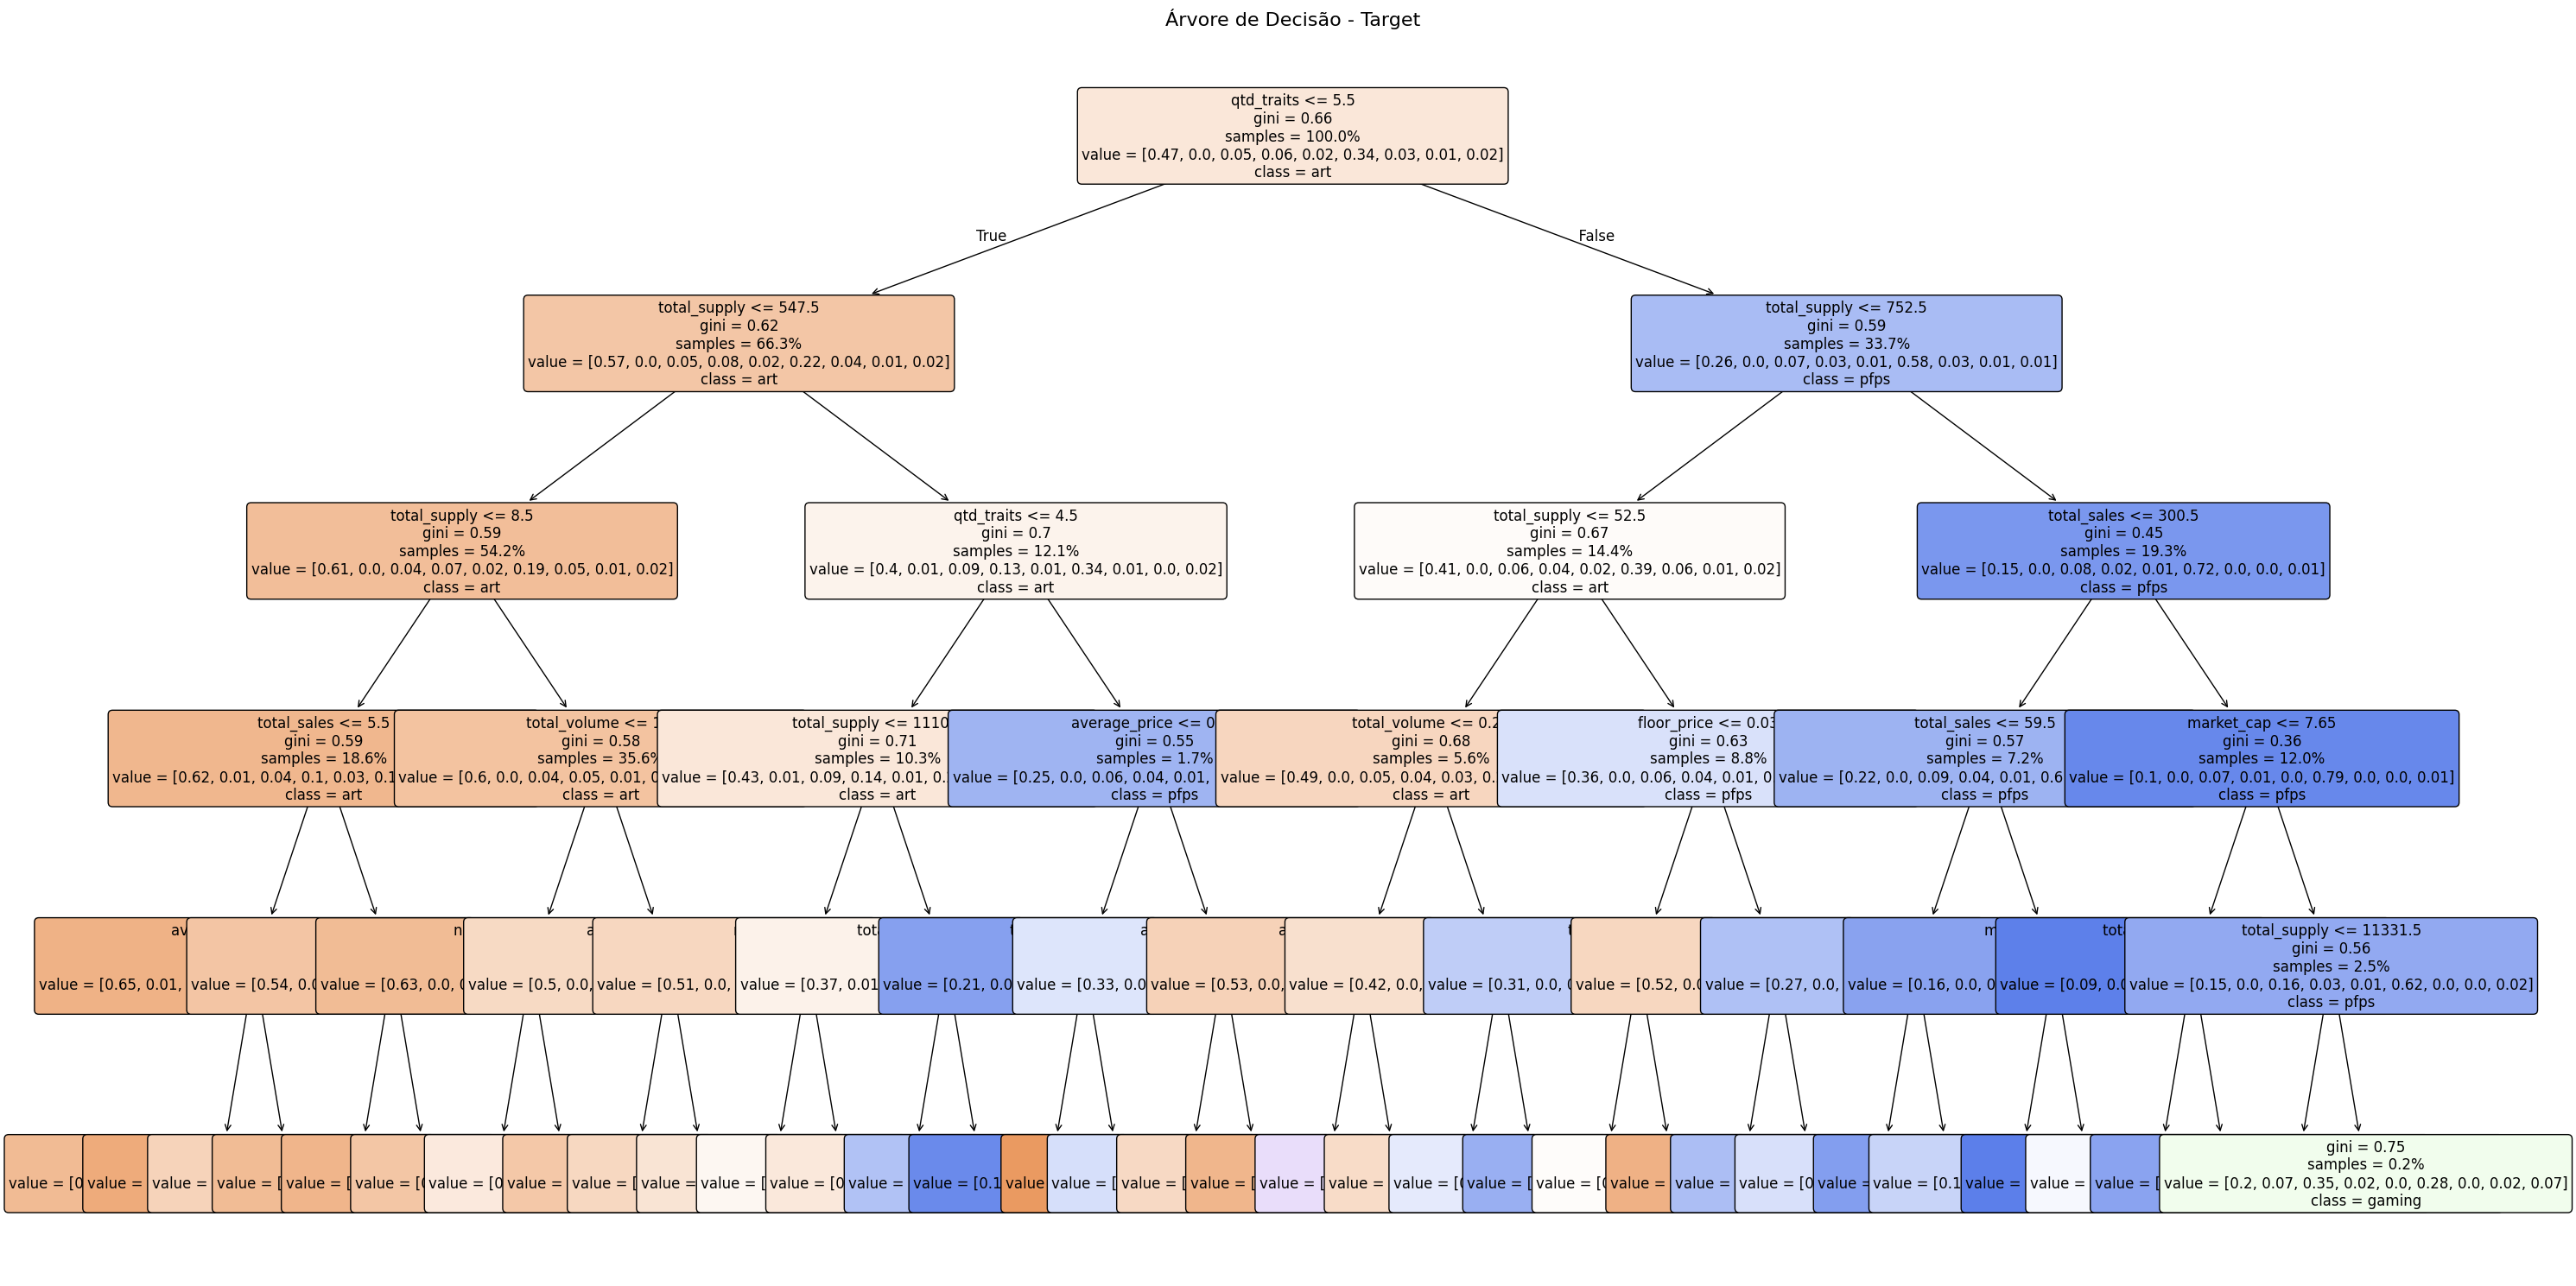


Importância dos atributos:
        Atributo  Importância
8     qtd_traits     0.553411
2   total_supply     0.306999
1    total_sales     0.046572
0   total_volume     0.022423
4  average_price     0.020256
7    floor_price     0.019047
6     market_cap     0.017283
3     num_owners     0.007984
9    qtd_editors     0.006025
5    num_reports     0.000000


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

data = pd.read_csv('./../nft_collections.csv')

print("Colunas disponíveis:", data.columns)

target_col = 'target'

X = data.drop(columns=[target_col, 'category'])
y = data['category']

categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

plt.figure(figsize=(30, 15))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=np.unique(y).astype(str),
    filled=True,
    rounded=True,
    fontsize=12,  # Aumentar o tamanho da fonte
    proportion=True,  # Balancear proporção dos nós
    precision=2
)
plt.title("Árvore de Decisão - Target", fontsize=16)
plt.tight_layout()

plt.savefig('decision_tree_nft.png', dpi=300, bbox_inches='tight')
print("Árvore salva como 'decision_tree_nft.png'")

plt.show()

importance = pd.DataFrame({
    'Atributo': X.columns,
    'Importância': clf.feature_importances_
}).sort_values(by='Importância', ascending=False)

print("\nImportância dos atributos:")
print(importance)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.table import Table

data = pd.read_csv('./../nft_collections.csv')

print("Colunas disponíveis:", data.columns)

target_col = 'category'

X = data.drop(columns=[target_col, 'target'])
y = data[target_col]

categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

class_counts = Counter(y_test)
minority_class = min(class_counts, key=class_counts.get)
print(f"Classe minoritária: {minority_class} (ocorrências: {class_counts[minority_class]})")

precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=[minority_class], average=None)

print(f"\nMétricas para a classe minoritária ({minority_class}):")
print(f"Precisão: {precision[0]:.2f}")
print(f"Revocação (Recall): {recall[0]:.2f}")
print(f"F1-Score: {f1[0]:.2f}")

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
if minority_class in np.unique(y_test):
    minority_idx = np.where(np.unique(y_test) == minority_class)[0][0]
    TN = cm.sum() - (cm[minority_idx, :].sum() + cm[:, minority_idx].sum() - cm[minority_idx, minority_idx])
    FP = cm[:, minority_idx].sum() - cm[minority_idx, minority_idx]
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    print(f"Especificidade para a classe minoritária: {specificity:.2f}")
else:
    print("Classe minoritária não encontrada no conjunto de teste.")

importance = pd.DataFrame({
    'Atributo': X.columns,
    'Importância': clf.feature_importances_
}).sort_values(by='Importância', ascending=False)

print("\nImportância dos atributos:")
print(importance)

plt.figure(figsize=(12, 10))
plt.title("Desempenho do Modelo e Importância dos Atributos", fontsize=16, pad=20)
plt.axis('off')

metrics_data = [
    ["Acurácia", f"{accuracy:.2f}"],
    ["Classe Minoritária", minority_class],
    ["Precisão (Minoritária)", f"{precision[0]:.2f}"],
    ["Revocação (Minoritária)", f"{recall[0]:.2f}"],
    ["F1-Score (Minoritária)", f"{f1[0]:.2f}"],
    ["Especificidade (Minoritária)", f"{specificity:.2f}"]
]
metrics_table = plt.table(
    cellText=metrics_data,
    colLabels=["Métrica", "Valor"],
    cellLoc='center',
    loc='center',
    bbox=[0.05, 0.55, 0.4, 0.4]
)
metrics_table.auto_set_font_size(False)
metrics_table.set_fontsize(10)
metrics_table.scale(1.2, 1.2)

importance_table = plt.table(
    cellText=importance.values,
    colLabels=importance.columns,
    cellLoc='center',
    loc='center',
    bbox=[0.55, 0.1, 0.4, 0.85]
)
importance_table.auto_set_font_size(False)
importance_table.set_fontsize(10)
importance_table.scale(1.2, 1.2)

plt.savefig("performance_metrics.png", dpi=300, bbox_inches='tight')
plt.close()
print("Imagem salva: performance_metrics.png")

Colunas disponíveis: Index(['total_volume', 'total_sales', 'total_supply', 'num_owners',
       'average_price', 'num_reports', 'market_cap', 'floor_price', 'category',
       'qtd_traits', 'qtd_editors', 'target'],
      dtype='object')
Acurácia no conjunto de teste: 0.60
Classe minoritária: domain-names (ocorrências: 31)

Métricas para a classe minoritária (domain-names):
Precisão: 0.00
Revocação (Recall): 0.00
F1-Score: 0.00
Especificidade para a classe minoritária: 1.00

Importância dos atributos:
        Atributo  Importância
8     qtd_traits     0.553411
2   total_supply     0.306999
1    total_sales     0.046572
0   total_volume     0.022423
4  average_price     0.020256
7    floor_price     0.019047
6     market_cap     0.017283
3     num_owners     0.007984
9    qtd_editors     0.006025
5    num_reports     0.000000


/home/lucas.gomes/Documents/personal/topicos-ia/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Imagem salva: performance_metrics.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.table import Table

data = pd.read_csv('./../nft_collections.csv')

print("Colunas disponíveis:", data.columns)

X = data.drop(columns=['category', 'target'])
y = data['category']

X_original = X.copy()
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test_original = X_original.loc[X_test.index]

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

np.random.seed(43)  # Para reprodutibilidade
random_indices = X_test.sample(n=3, random_state=43).index
instances = X_test.loc[random_indices]
instances_original = X_test_original.loc[random_indices]
true_labels = y_test.loc[random_indices]
predicted_labels = clf.predict(instances)

for i, idx in enumerate(random_indices):
    plt.figure(figsize=(10, 8))
    
    data_table = [[col, instances_original.loc[idx, col]] for col in instances_original.columns]
    data_table.append(["Classe Verdadeira", true_labels[idx]])
    data_table.append(["Classe Predita", predicted_labels[i]])
    
    explanation = ["Explicação da Predição:"]
    node_indicator = clf.decision_path(instances)
    node_index = node_indicator.indices[node_indicator.indptr[i]:node_indicator.indptr[i+1]]
    for node_id in node_index:
        if clf.tree_.children_left[node_id] == clf.tree_.children_right[node_id]:  # Nó folha
            continue
        feature = clf.tree_.feature[node_id]
        threshold = clf.tree_.threshold[node_id]
        value = instances.iloc[i][feature]
        feature_name = X.columns[feature]
        if value <= threshold:
            explanation.append(f"{feature_name} <= {threshold:.2f} (valor: {value:.2f}) -> Ramo esquerdo")
        else:
            explanation.append(f"{feature_name} > {threshold:.2f} (valor: {value:.2f}) -> Ramo direito")
    
    plt.title(f"Instância {i+1} (Índice: {idx})", fontsize=14, pad=20)
    plt.axis('off')
    
    table = plt.table(
        cellText=data_table,
        colLabels=["Atributo", "Valor"],
        cellLoc='center',
        loc='center',
        bbox=[0.05, 0.4, 0.9, 0.55]
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    
    plt.text(
        0.5, 0.35, "\n".join(explanation),
        fontsize=10, ha='center', va='top', wrap=True,
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
    )
    
    plt.savefig(f"instance_{i+1}.png", dpi=300, bbox_inches='tight')
    plt.close()
    print(f"Imagem salva: instance_{i+1}.png")


plt.figure(figsize=(8, 6))
plt.title("Importância dos Atributos", fontsize=14)
table = plt.table(
    cellText=importance.values,
    colLabels=importance.columns,
    cellLoc='center',
    loc='center',
    bbox=[0.1, 0.1, 0.8, 0.8]
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.axis('off')
plt.savefig("feature_importance.png", dpi=300, bbox_inches='tight')
plt.close()
print("Imagem salva: feature_importance.png")

Colunas disponíveis: Index(['total_volume', 'total_sales', 'total_supply', 'num_owners',
       'average_price', 'num_reports', 'market_cap', 'floor_price', 'category',
       'qtd_traits', 'qtd_editors', 'target'],
      dtype='object')
Acurácia no conjunto de teste: 0.60


/tmp/ipykernel_260452/1188146612.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = instances.iloc[i][feature]


Imagem salva: instance_1.png


/tmp/ipykernel_260452/1188146612.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = instances.iloc[i][feature]


Imagem salva: instance_2.png


/tmp/ipykernel_260452/1188146612.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = instances.iloc[i][feature]


Imagem salva: instance_3.png
Imagem salva: feature_importance.png
